In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
from CMMToolbox import bioreactor as br# Importing the bioreactor module
from CMMToolbox import operation as op# Importing the operation module

import matplotlib.pyplot as plt
import random

In [2]:
from CMMDatabase import eco_met_glc # Call my strain metabolism
from CMMDatabase import bionet_std # Call my bionet standard parameters
from CMMDatabase import batch_std # Call my bionet batch operation standard parameters
from CMMDatabase import chemostat_dr10std # Call my bionet chemostat operation standard parameters

# Define the biologicals dictionary with the strain, biomass concentration, and metabolism type
biologicals = {
    'strains': ['ECO'],  # List of Strains 
    'X': [0.1],  # Biomass concentration g/L
    'met': [eco_met_glc],  # Metabolism type
}

In [3]:
# Create the objects for the bioreactor and operations simulations
R1 = br(biologicals, bionet_std)
B1 = op('Test_Batch',batch_std,dt=0.05, regulation=None)  # Creating an operation with no pulse volume addition
C1=  op('Test_Chemostat',chemostat_dr10std,dt=0.05, regulation=None)  # Creating another operation with no pulse volume addition

In [4]:
R1.print_info()

Bioreactor ID: Reactor_1
Bioreactor state at time 0 hours.
biologicals Components: {'strains': ['ECO'], 'X': array([0.1]), 'met': [{'N': ['Glucose', 'Acetate'], 'S': ['GLC', 'ACE'], 'R': array([1., 1.]), 'type': 'inhibition', 'v': array([0.7, 0.3]), 'Ks': array([0.25, 0.01]), 'Yx': array([0.5, 0.3]), 'P': ['ACE', None], 'Yp': array([0.3, 0. ]), 'I': ['ACE', 'GLC'], 'Ki': array([9.22337204e+18, 2.50000000e-01])}]}
parameters Components: {'V': 1.0, 'pH': 7.0, 'T': 37.0, 'DOT': 0.005, 'GLC': 5.0, 'ACE': 0.0, 'kla': 0.1}


Bioreactor state updated to 0.05 hours.
Bioreactor state updated to 0.1 hours.
Bioreactor state updated to 0.15000000000000002 hours.
Bioreactor state updated to 0.2 hours.
Bioreactor state updated to 0.25 hours.
Bioreactor state updated to 0.3 hours.
Bioreactor state updated to 0.35 hours.
Bioreactor state updated to 0.39999999999999997 hours.
Bioreactor state updated to 0.44999999999999996 hours.
Bioreactor state updated to 0.49999999999999994 hours.
Bioreactor state updated to 0.5499999999999999 hours.
Bioreactor state updated to 0.6 hours.
Bioreactor state updated to 0.65 hours.
Bioreactor state updated to 0.7000000000000001 hours.
Bioreactor state updated to 0.7500000000000001 hours.
Bioreactor state updated to 0.8000000000000002 hours.
Bioreactor state updated to 0.8500000000000002 hours.
Bioreactor state updated to 0.9000000000000002 hours.
Bioreactor state updated to 0.9500000000000003 hours.
Bioreactor state updated to 1.0000000000000002 hours.
Bioreactor state updated to 1.05

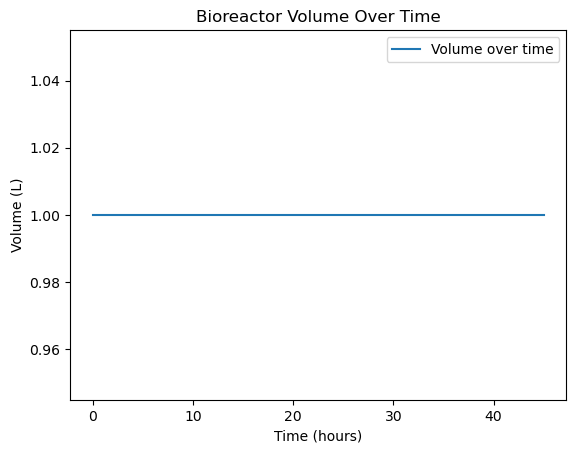

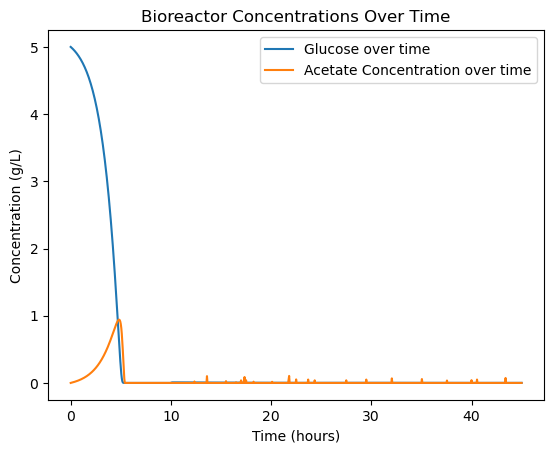

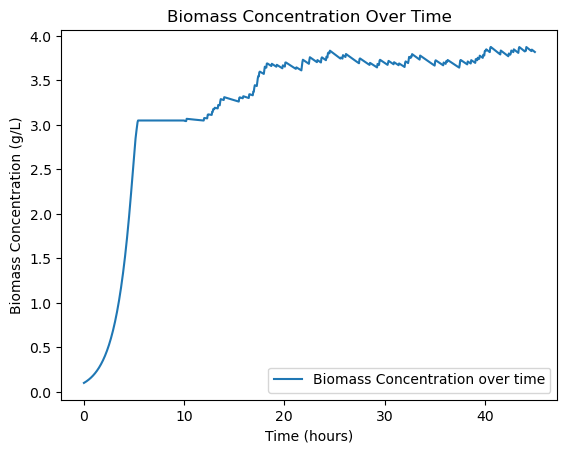

In [5]:
##### YOU CAN DECIDE WHAT VARIABLES YOU WISH TO SAVE AND HOW TO SAVE THEM, I CHOSE HERE LIST FOR CONVENIENCE #####
# Initialize lists to collect data for plotting
# Constructing the lists to collect data for plotting
V=[]
t=[]
X=[]
G=[]
A=[]
# Fill the lists with initial values
V.append(R1.parameters['V'])  # Collecting the volume after each operation
t.append(R1.time)  # Collecting the time after each operation
X.append(R1.biologicals['X'][0])  # Collecting the biomass concentration after each operation
G.append(R1.parameters['GLC'])  # Collecting the growth rate after each operation
A.append(R1.parameters['ACE'])  # Collecting the biomass concentration after each operation

##### ACTUAL SIMULATION #####
# Run the simulation for 900 time steps (45 hours) with a time step of 0.05 hours
for i in range(900):
    if t[-1] > 10.0:  # If the time exceeds 10 hours, switch to chemostat operation   
        R1.operate_dt(C1,verbose=True)  # Operate the bioreactor with a time step of 0.01 hours
    else:  # If the time is less than or equal to 10 hours, continue with batch operation
        R1.operate_dt(B1,verbose=True)

    # Collecting data after each operation
    V.append(R1.parameters['V'])  # Collecting the volume after each operation
    t.append(R1.time)  # Collecting the time after each operation
    G.append(R1.parameters['GLC'])  # Collecting the growth rate after each operation
    A.append(R1.parameters['ACE'])  # Collecting the biomass concentration after each operation
    X.append(R1.biologicals['X'][0])  # Collecting the biomass concentration after each operation
###### External Regulation Example ######
    # Update the chemostat operation by regulation --> to be developed into this C1.update_by_regulation(R1)
    # Testing a easy regulation by randomly adding a pulse volume
    if t[-1] > 10.0:
        if random.random() < 0.1:
            C1.parameters['V_pl'] = random.uniform(0.1, 0.5)  # Randomly adding a pulse volume between 0.1 and 0.5 L
        else:
            C1.parameters['V_pl'] = 0.0  # No pulse volume addition if the random condition is not met

plt.plot(t, V, label='Volume over time')  # Plotting the volume over time
plt.xlabel('Time (hours)')
plt.ylabel('Volume (L)')
plt.title('Bioreactor Volume Over Time')
plt.legend()
plt.show()  # Display the plot

plt.plot(t, G, label='Glucose over time')  # Plotting the growth rate over time
plt.plot(t, A, label='Acetate Concentration over time')  # Plotting the biomass concentration over time
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/L)')
plt.title('Bioreactor Concentrations Over Time')
plt.legend()
plt.show()  # Display the plot

plt.plot(t,X, label='Biomass Concentration over time')  # Plotting the biomass concentration over time
plt.xlabel('Time (hours)')
plt.ylabel('Biomass Concentration (g/L)')
plt.title('Biomass Concentration Over Time')
plt.legend()
plt.show()  # Display the plot
